In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from src.nb_00 import *
from fastai.vision import *
from fastai.metrics import error_rate

# Esto lo tuve que agregar porque algunas fotos tiraban error al cargar.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Data

In [3]:
labels = pd.read_csv('../data/raw/train.csv', usecols=['fileName', 'tag'])
labels['fileName'] = 'train/' + labels['fileName'].astype(str) + '.jpg'

In [4]:
idxs = make_train_valid(labels)[0]

train_size = len(idxs[0])
val_size = len(idxs[1])

In [5]:
path = '../data/raw'

### Without one-hot-encoded targets

In [6]:
bs = 32
data = (ImageList
        .from_df(labels, path)
        .split_by_idxs(range(0, train_size), range(train_size, len(labels)))
        .label_from_df()
        .add_test_folder('test')
        .transform(get_transforms(), size=299)
        .databunch(bs=bs,num_workers=12)
       ).normalize(imagenet_stats)

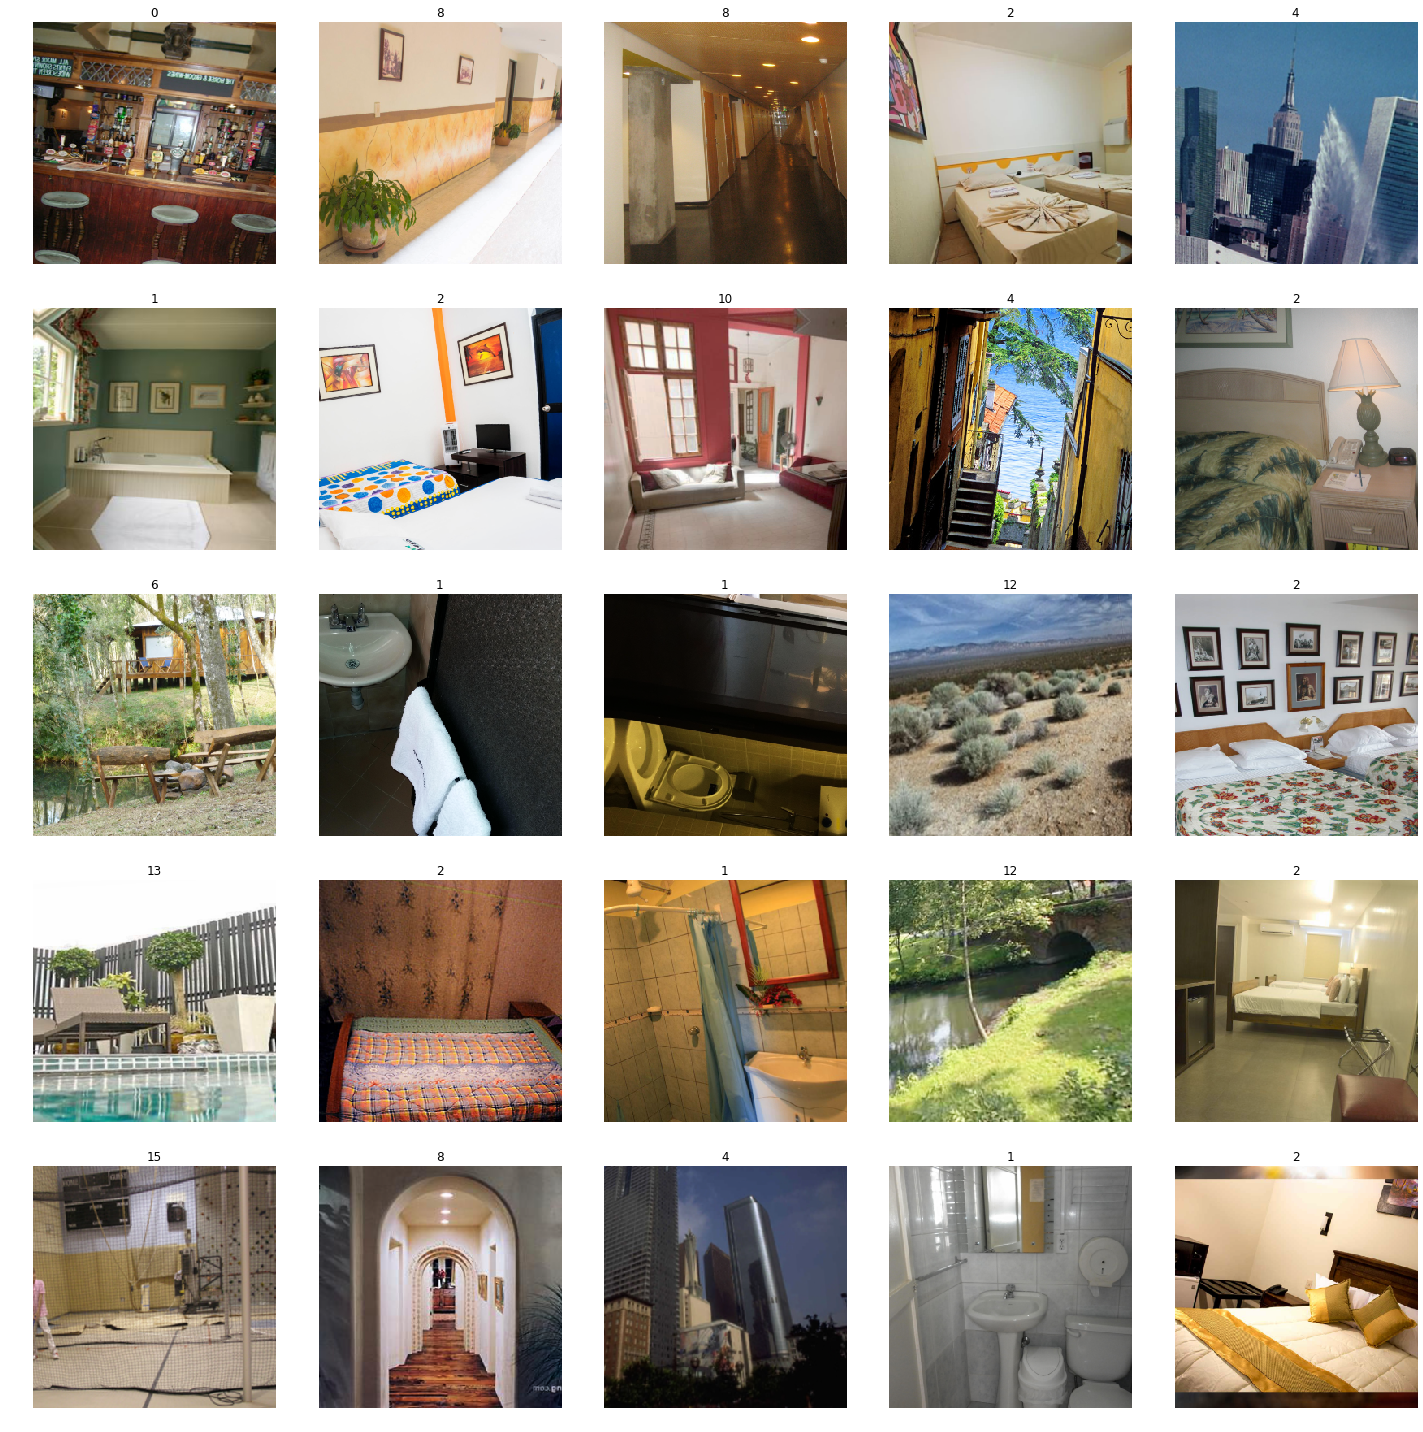

In [7]:
data.show_batch()

In [8]:
xb, yb = next(iter(data.valid_dl))
yb

tensor([ 4,  2,  1,  8, 12,  2,  8,  3,  2,  2,  2,  8, 11, 14,  2,  8,  7, 10,
         4,  1,  2,  9,  8,  2, 12,  2,  2,  9,  8, 10, 12,  1],
       device='cuda:0')

### With one-hot-encoded targets

In [9]:
bs = 32
# Para que haga one-hot-encoding en el target le hago pensar a fastai que voy a hacer 
# clasificación con múltiples etiquetas. Esto lo logro dándole como target una lista
# que en este caso tiene un sólo elemento.
labels['tag'] = labels['tag'].apply(lambda x: [x])
data = (ImageList
        .from_df(labels, path)
        .split_by_idxs(range(0, train_size), range(train_size, len(labels)))
        .label_from_df()
        .add_test_folder('test')
        .transform(get_transforms(), size=299)
        .databunch(bs=bs,num_workers=12)
       )

Ahora el target está one-hot-encoded

In [10]:
xb, yb = next(iter(data.valid_dl))
yb

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [11]:
#export
def get_data(df_labels, train_size, path='../data/raw', size=299, bs=32, one_hot=False, tfms = None, n_workers=12):
    df_labels = df_labels.copy()
    if one_hot:
        # Para que haga one-hot-encoding en el target le hago pensar a fastai que voy a hacer 
        # clasificación con múltiples etiquetas. Esto lo logro dándole como target una lista
        # que en este caso tiene un sólo elemento.
        df_labels['tag'] = df_labels['tag'].apply(lambda x:[x])
    
    data = (ImageList
        .from_df(df_labels, path)
        .split_by_idxs(range(0, train_size), range(train_size, len(df_labels)))
        .label_from_df()
        .add_test_folder('test')
        .transform(tfms=tfms, size=size)
        .databunch(bs=bs,num_workers=n_workers)).normalize(imagenet_stats)
    return data

## Export

In [4]:
!python notebook2script.py 01_data.ipynb

Converted 01_data.ipynb to ../src/nb_01.py


In [5]:
    data = (ImageList
        .from_df(df_labels, path)
        .split_by_idxs(range(0, train_size), range(train_size, len(df_labels)))
        .label_from_df()
        .add_test_folder('test')
        .transform(tfms=tfms, size=size)
        .databunch(bs=bs,num_workers=n_workers)).normalize(imagenet_stats)


AttributeError: type object 'ImageList' has no attribute 'add_test_folder'